In [26]:
library("DESeq2")
library(sqldf)
library(ggplot2)
library(reshape2)
library(fields)
library("gridExtra")
library(ggtern)
library(clue)
library(geometry)
require(gtable)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: spam
Loading required package: grid
Spam version 1.4-0 (2016-08-29) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following object is masked from ‘package:stats4’:

    mle

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps

Attaching package: ‘gridExtra’

The following object is masked from ‘package:Biobase’:

    combine

The following object is masked from ‘package:BiocGenerics’:

    combine

--
Consider donating at: http://ggtern.com
Even small amounts (say $10-50) are very much appreciated!
Remember to cite, run citation(package = 'ggtern') for further info.
--

Attaching package: ‘ggt

In [2]:
samples=c("Sample_118A",
          "Sample_119B",
          "Sample_120A",
          "DF5","DF19",
          "Sample_103A",
          "Sample_104B",
          "Sample_105B",
          "spike_Z32_rep1",
          "spike_Z32_rep2")

In [3]:
tmp<-read.csv(paste0("kallisto_out/","Sample_118A","/abundance.tsv"), sep="\t")
head(tmp)
tpms<-tmp[,c("target_id", "tpm")]
counts<-tmp[,c("target_id", "est_counts")]
colnames(counts)<-c("transcript", "Sample_118A")
colnames(tpms)<-c("transcript", "Sample_118A")

target_id,length,eff_length,est_counts,tpm
TRINITY_DN98_c0_g1_i1,985,795.675,761,228.4610
TRINITY_DN2_c0_g1_i1,1096,906.675,1281,337.4900
TRINITY_DN48_c0_g1_i1,789,599.675,80,31.8667
TRINITY_DN70_c0_g1_i1,1074,884.675,922,248.9490
TRINITY_DN66_c0_g1_i1,365,184.299,0,0.0000
TRINITY_DN66_c0_g1_i2,321,146.208,0,0.0000


In [4]:
samples=c("Sample_119B",
          "Sample_120A",
          "DF5","DF19",
          "Sample_103A",
          "Sample_104B",
          "Sample_105B",
          "spike_Z32_rep1",
          "spike_Z32_rep2")
for(s in samples){
    tmp<-read.csv(paste0("kallisto_out/",s,"/abundance.tsv"), sep="\t")
    tmp_tpms<-tmp[,c("target_id", "tpm")]
    tmp_counts<-tmp[,c("target_id", "est_counts")]
    colnames(tmp_counts)<-c("transcript", s)
    colnames(tmp_tpms)  <-c("transcript", s) 
    tpms<-merge  (tpms,   tmp_tpms,   by="transcript")
    counts<-merge(counts, tmp_counts, by="transcript")
}

head(tpms)

transcript,Sample_118A,Sample_119B,Sample_120A,DF5,DF19,Sample_103A,Sample_104B,Sample_105B,spike_Z32_rep1,spike_Z32_rep2
TRINITY_DN0_c0_g1_i1,28.37350,25.41180,23.71480,32.8698,40.3634,30.38970,13.4874,41.61810,0.00,28.45770
TRINITY_DN1_c0_g1_i2,0.00000,3.97277,11.38470,0.0000,0.0000,4.49144,16.2176,0.00000,0.00,0.00000
TRINITY_DN10_c0_g1_i1,299.71300,241.06900,219.43700,51.2195,82.3845,296.91800,184.6100,261.32300,0.00,381.04100
TRINITY_DN10_c0_g2_i1,290.24400,222.89100,208.87300,534.4530,542.2880,329.21600,175.6810,269.49600,0.00,725.45700
TRINITY_DN100_c0_g1_i1,2.83821,5.57905,4.16968,0.0000,0.0000,1.35066,0.0000,2.01609,0.00,7.70087
TRINITY_DN1000_c0_g1_i10,643.50800,579.28900,744.83900,677.3750,698.9480,833.50400,553.2740,1288.65000,2386.61,1068.40000


In [5]:
head(counts)

transcript,Sample_118A,Sample_119B,Sample_120A,DF5,DF19,Sample_103A,Sample_104B,Sample_105B,spike_Z32_rep1,spike_Z32_rep2
TRINITY_DN0_c0_g1_i1,121.00,101.00,95.00,91.00,170.00,108.00,37.00,99.00,0.00,18.000
TRINITY_DN1_c0_g1_i2,0.00,1.00,3.00,0.00,0.00,1.00,3.00,0.00,0.00,0.000
TRINITY_DN10_c0_g1_i1,152.00,112.00,107.00,16.00,39.00,126.00,63.00,75.00,0.00,26.000
TRINITY_DN10_c0_g2_i1,252.00,177.00,175.00,299.00,461.00,242.00,101.00,133.00,0.00,91.000
TRINITY_DN100_c0_g1_i1,5.00,9.00,7.00,0.00,0.00,2.00,0.00,2.00,0.00,2.000
TRINITY_DN1000_c0_g1_i10,2663.44,2233.68,2896.81,1819.99,2857.04,2875.45,1473.26,2975.73,2592.91,655.791


In [6]:
write.table(tpms, sep="\t", row.names=F, file="tpms.tsv")
write.table(counts, sep="\t", row.names=F, file="counts.tsv")

In [8]:
metadata<-read.csv(file = "metadata_tutorial.csv")
row.names(metadata) <- metadata$Sample.IDs  
head(metadata)


,Provider,Sample.IDs,scientific_name,study_title,High.level.variety,High.level.tissue,High.level.age,High.level.stress.disease,Variety,Tissue,Age,Stress.disease,Intermediate
Sample_118A,M. Davey BCS,Sample_118A,Triticum aestivum,Development,Azhurnaya,spike,reproductive,none,Azhurnaya,spike,30% spike,none,spike
Sample_119B,M. Davey BCS,Sample_119B,Triticum aestivum,Development,Azhurnaya,spike,reproductive,none,Azhurnaya,spike,30% spike,none,spike
Sample_120A,M. Davey BCS,Sample_120A,Triticum aestivum,Development,Azhurnaya,spike,reproductive,none,Azhurnaya,spike,30% spike,none,spike
DF5,Vijay Tiwari & Raju Datla,DF5,Triticum aestivum,CS_spike,Chinese Spring,spike,reproductive,none,Chinese Spring,spike,Ear emergence,none,spike
DF19,Vijay Tiwari & Raju Datla,DF19,Triticum aestivum,CS_spike,Chinese Spring,spike,reproductive,none,Chinese Spring,spike,Ear emergence,none,spike
Sample_103A,M. Davey BCS,Sample_103A,Triticum aestivum,Development,Azhurnaya,roots,reproductive,none,Azhurnaya,roots,30% spike,none,roots


In [9]:

row.names(counts) <- counts$transcript
counts$transcript<-NULL
counts<-as.matrix(counts)
counts<-round(counts)
head(counts)

,Sample_118A,Sample_119B,Sample_120A,DF5,DF19,Sample_103A,Sample_104B,Sample_105B,spike_Z32_rep1,spike_Z32_rep2
TRINITY_DN0_c0_g1_i1,121,101,95,91,170,108,37,99,0,18
TRINITY_DN1_c0_g1_i2,0,1,3,0,0,1,3,0,0,0
TRINITY_DN10_c0_g1_i1,152,112,107,16,39,126,63,75,0,26
TRINITY_DN10_c0_g2_i1,252,177,175,299,461,242,101,133,0,91
TRINITY_DN100_c0_g1_i1,5,9,7,0,0,2,0,2,0,2
TRINITY_DN1000_c0_g1_i10,2663,2234,2897,1820,2857,2875,1473,2976,2593,656


In [10]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = metadata,
                              design= ~ High.level.tissue)
dds <- DESeq(dds)
resultsNames(dds) # lists the coefficients
#res <- results(dds, name="condition_trt_vs_untrt")
#

converting counts to integer mode
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 98 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


[1] "Intercept"              "High.level.tissueroots" "High.level.tissuespike"

In [11]:
res <- results(dds)
res

log2 fold change (MAP): High.level.tissue spike vs roots 
Wald test p-value: High.level.tissue spike vs roots 
DataFrame with 3153 rows and 6 columns
                           baseMean log2FoldChange     lfcSE       stat
                          <numeric>      <numeric> <numeric>  <numeric>
TRINITY_DN0_c0_g1_i1     69.2962906     -0.1234264  1.000071 -0.1234177
TRINITY_DN1_c0_g1_i2      0.7350242     -1.4005006  1.978125 -0.7079940
TRINITY_DN10_c0_g1_i1    63.2121149     -0.5464573  1.063922 -0.5136253
TRINITY_DN10_c0_g2_i1   178.1967190      0.4001009  1.096113  0.3650180
TRINITY_DN100_c0_g1_i1    2.5586280      1.2284890  1.555002  0.7900239
...                             ...            ...       ...        ...
TRINITY_DN998_c0_g1_i6   74.4104193     -0.6629037 0.6742111 -0.9832286
TRINITY_DN998_c0_g1_i7    7.1318449      0.2231215 1.2270612  0.1818341
TRINITY_DN998_c0_g1_i9    0.8553875      0.8130700 1.8519177  0.4390422
TRINITY_DN999_c0_g1_i4    4.0232127     -1.0065372 1.30637

In [12]:
resultsNames(dds)

[1] "Intercept"              "High.level.tissueroots" "High.level.tissuespike"

In [13]:
resOrdered <- res[order(res$pvalue),]

In [14]:
resOrdered


log2 fold change (MAP): High.level.tissue spike vs roots 
Wald test p-value: High.level.tissue spike vs roots 
DataFrame with 3153 rows and 6 columns
                          baseMean log2FoldChange     lfcSE       stat
                         <numeric>      <numeric> <numeric>  <numeric>
TRINITY_DN1102_c0_g1_i2   2479.624     -12.159190 1.0084453 -12.057362
TRINITY_DN542_c0_g1_i3    4364.734     -12.690004 1.1125081 -11.406663
TRINITY_DN720_c0_g1_i3    1062.567     -13.488051 1.2905883 -10.451087
TRINITY_DN825_c0_g3_i1     381.818     -11.107799 1.0776482 -10.307445
TRINITY_DN1021_c0_g1_i1   1201.190       8.371207 0.8389159   9.978601
...                            ...            ...       ...        ...
TRINITY_DN769_c0_g1_i4  142.633962     -10.348127  1.641829  -6.302805
TRINITY_DN908_c0_g3_i1    6.378246      -6.202543  1.710216  -3.626760
TRINITY_DN951_c1_g1_i3   19.118225      -7.442948  1.507773  -4.936383
TRINITY_DN951_c2_g4_i1   51.004592      -8.979314  1.652242  -5.43462

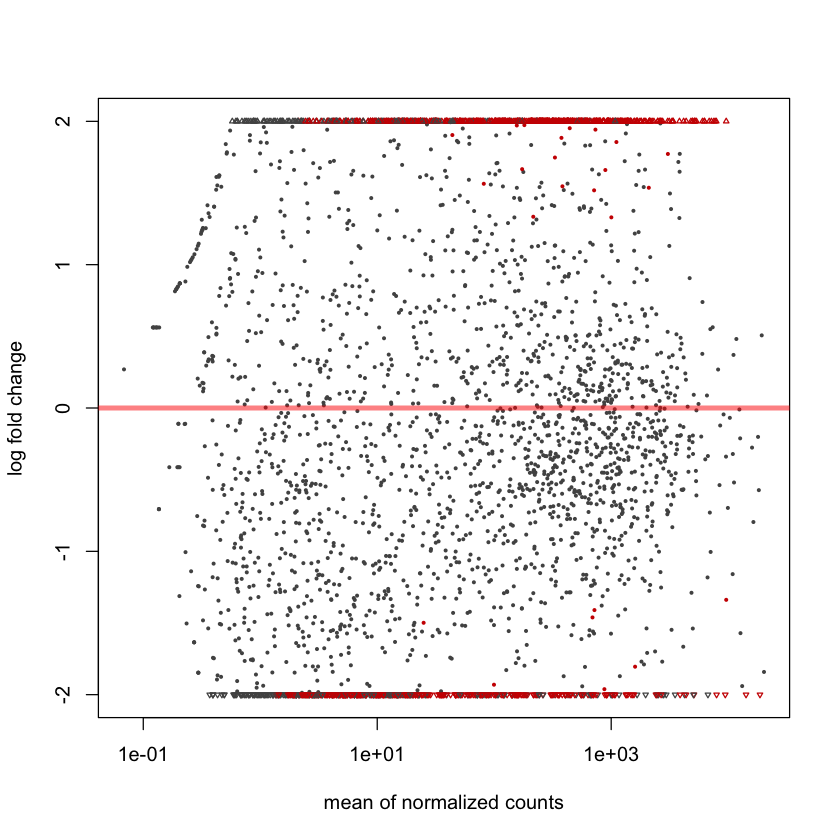

In [15]:
plotMA(res, ylim=c(-2,2))

In [16]:
head(coef(dds))

,Intercept,High.level.tissueroots,High.level.tissuespike
TRINITY_DN0_c0_g1_i1,6.1378418,0.06175783,-0.06166861
TRINITY_DN1_c0_g1_i2,-0.2540043,0.70024844,-0.70025213
TRINITY_DN10_c0_g1_i1,6.0610087,0.27327269,-0.27318459
TRINITY_DN10_c0_g2_i1,7.3828696,-0.19999681,0.20010413
TRINITY_DN100_c0_g1_i1,0.9067426,-0.61423790,0.61425109
TRINITY_DN1000_c0_g1_i10,11.0611082,0.10040474,-0.10024395


In [17]:
getUPDownRegulated <- function(results) {
    
    # make the lists
    print(nrow(results))
    results<-results[!is.na(results$padj)   &
                     results$padj < 0.00005 & 
                     abs(results$log2FoldChange) > 2,  ]
    print(nrow(results))
    #upgenes <- rownames(head(results[ order( results$log2FoldChange ), ], n=20))
    #downgenes <- rownames(head(results[ order( -results$log2FoldChange ), ], n=20))
    results$up_down  <- ifelse(results$log2FoldChange > 0, "up", "down")    
   #print(head(upgenes))
   #print(head(downgenes))
    results
}

r<-getUPDownRegulated(res)
r

[1] 3153
[1] 244


log2 fold change (MAP): High.level.tissue spike vs roots 
Wald test p-value: High.level.tissue spike vs roots 
DataFrame with 244 rows and 7 columns
                          baseMean log2FoldChange     lfcSE      stat
                         <numeric>      <numeric> <numeric> <numeric>
TRINITY_DN1002_c0_g1_i2  2751.4426       6.191711 1.3157416  4.705871
TRINITY_DN1004_c1_g1_i1   135.4506       5.643641 1.0112231  5.581005
TRINITY_DN1004_c1_g1_i3  1384.3486       5.898146 0.9718565  6.068948
TRINITY_DN1010_c0_g1_i1   883.0886      -7.767928 1.3022094 -5.965191
TRINITY_DN1010_c0_g1_i2   259.9836      -8.352608 1.1864567 -7.039960
...                            ...            ...       ...       ...
TRINITY_DN979_c0_g1_i1  6034.06435       5.869500 0.7967535  7.366770
TRINITY_DN979_c0_g1_i2    31.62964       7.344904 1.4827106  4.953700
TRINITY_DN981_c0_g1_i1   526.94179       4.803011 0.6913665  6.947127
TRINITY_DN981_c0_g1_i2   272.56697       3.705103 0.6808288  5.442047
TRINITY_DN9

In [18]:
write.csv(r, file="differentially_expressed.csv")

In [27]:
getSamplesForFactor<- function(metadata, type="High.level.tissue",factor="roots"){
    ret<-""
    if(type != "all"){
        ret<-as.character(metadata[metadata[,type] == factor,]$Sample.IDs)
    }else{
        ret<-unique(metadata$Sample.IDs)
    }
    ret
}
getMeansPerFactor<- function(values, metadata,  type="High.level.tissue",factor="roots"){
    samples <- getSamplesForFactor(metadata, type, factor)
    vals <- values[,samples]
    mean<-0
    if(length(samples) == 1){
        print("This factor only has one sample!")
        print(factor)
        mean<-vals
    }else{
        mean<-rowMeans(vals)
    }
    
    
    mean<-sort(mean,decreasing=T)
    cumulative <- cumsum(mean)
    
    cumulative<-data.frame(cumulative)
    mean<-data.frame(mean)
    
    mean$gene <- rownames(mean)
    cumulative$gene <- rownames(cumulative)
    mean$total_samples <- length(samples)
    
    n <-merge(mean,cumulative, by='gene', all=T)
    n <- n[order(n$cumulative,decreasing = F),]
    n$seq <- seq(from = 1, to = nrow(n))
    n$factor = factor
    n
}
getMeansForAllFactors<-function(values, metadata,  type="High.level.tissue"){
    factors<-unique(metadata[,type])
    f<-factors[1]
    meansDFs <- getMeansPerFactor(tpms,metadata,type=type, factor=f)
    for (i in 2:length(factors)){
        f<-factors[i]
        localDF<-getMeansPerFactor(tpms,metadata,type=type, factor=f)
        meansDFs <- rbind(meansDFs,localDF)
    }
    meansDFs
}

isExpressedPerFactor <- function(values, metadata,  type="High.level.tissue",factor="roots", minTPM=0.5){
    samples <- getSamplesForFactor(metadata, type, factor)
    vals <- values[,samples]
    means <- rowMeans(vals)
    expr <- means > minTPM
    m2 <- data.frame( expressed = expr)
    m2$factor<-factor
    m2$transcript<-rownames(m2)
    m2$total_samples <- length(samples)
    m2
}

getExclusiveExpression<-function(values, metadata, minTPM=0.5, type="High.level.tissue"){
    means <- getMeansForAllFactors(values, metadata,type=type)
    means$expressed<-means$mean > minTPM
    exclusiveExpresison<-sqldf("SELECT gene, factor, mean, total_samples 
        FROM means 
        WHERE expressed 
        GROUP BY gene HAVING count(factor) = 1 ")
   list(means, exclusiveExpresison )
}
get_means_df<-function(metadata, tpms, type="High.level.tissue", min_mean_tpm=0.5){
    samples<-getSamplesForFactor(metadata, type="all",factor="all")
    values<-data.frame(value=numeric(nrow(tpms)),stringsAsFactors=FALSE)
    if(length(samples) > 1){
        values$value<-rowMeans(tpms[,samples])
    }else{
        values$value<-tpms[,samples]
    }
     
    values$factor<-"all"
    values$gene<-rownames(tpms)
    values$samples<-length(samples)
    
    #print(unique(metadata[,type]))
    
    for(f in unique(metadata[,type])){
        #print(f)
        samples<-getSamplesForFactor(metadata, type=type,factor=f)
        
        tmp<-data.frame(value=numeric(nrow(tpms)),stringsAsFactors=FALSE)
        
        if(length(samples) > 1){
            tmp$value<-rowMeans(tpms[,samples])
        }else{
            tmp$value<-tpms[,samples]
        }
        
        tmp$factor<-f
        tmp$gene<-rownames(tpms)
        tmp$samples<-length(samples)
        values<-rbind(values,tmp)
    }
    
    casted<-dcast(values, gene~factor, value.var="value")
    casted$all<-NULL
   
    rownames(casted)<-casted$gene
    casted$gene<-NULL
    casted<-as.matrix(casted)
 
    tmp<-data.frame(value=numeric(nrow(casted)),stringsAsFactors=FALSE)
    tmp$value<-rowMeans(casted)
    tmp$factor<-"all_means"
    tmp$gene<-rownames(casted)
    tmp$samples<-ncol(casted)
    values<-rbind(values,tmp)
    
    casted<-ifelse(casted < min_mean_tpm, NA, casted)
    
    tmp<-data.frame(value=numeric(nrow(casted)),stringsAsFactors=FALSE)
    tmp$value<-rowMeans(casted, na.rm = TRUE)
   
    tmp$factor<-"all_mean_filter"
    tmp$gene<-rownames(casted)
    tmp$samples<-rowSums(!is.na(casted))
    
    values<-rbind(values,tmp)
    values
}

tpms_mat <- tpms
rownames(tpms_mat)<-tpms_mat$transcript
tpms_mat$transcript <- NULL
tpms_mat<-as.matrix(tpms_mat)
means_df<-get_means_df(metadata, tpms_mat)
head(means_df)

value,factor,gene,samples
26.468620,all,TRINITY_DN0_c0_g1_i1,10
3.606651,all,TRINITY_DN1_c0_g1_i2,10
201.771500,all,TRINITY_DN10_c0_g1_i1,10
329.859900,all,TRINITY_DN10_c0_g2_i1,10
2.365456,all,TRINITY_DN100_c0_g1_i1,10
947.439700,all,TRINITY_DN1000_c0_g1_i10,10


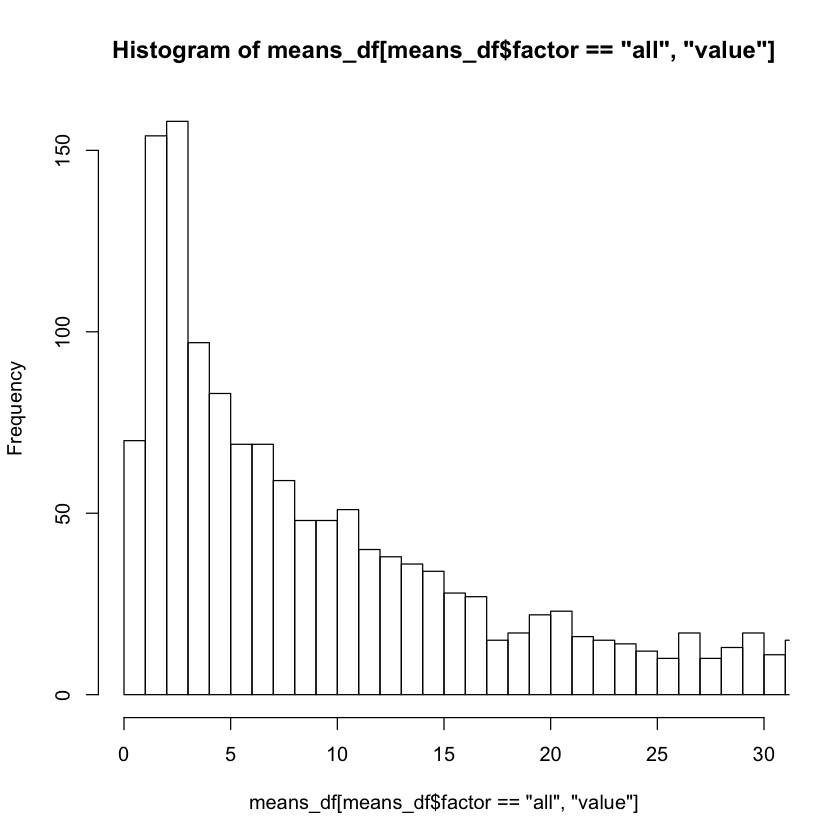

In [37]:
hist(means_df[means_df$factor == 'all', 'value'], breaks = 12000, xlim=c(0,30))

In [38]:
unique(means_df$factor)

[1] "all"             "spike"           "roots"           "all_means"      
[5] "all_mean_filter"

In [47]:

isExpressedPerFactor <- function(values, metadata,  type="High.level.tissue",factor="roots", minTPM=0.5){
    samples <- getSamplesForFactor(metadata, type, factor)
    vals <- values[,samples]
    means <- rowMeans(vals)
    expr <- means > minTPM
    m2 <- data.frame( expressed = expr)
    m2$factor<-factor
    m2$transcript<-rownames(m2)
    m2$total_samples <- length(samples)
    m2
}
roots_expressed<-isExpressedPerFactor(tpms_mat, metadata,  type="High.level.tissue",factor="roots", minTPM=10)
head(roots_expressed)
roots_expressed<-roots_expressed[roots_expressed$expressed, "transcript"]
head(roots_expressed)

,expressed,factor,transcript,total_samples
TRINITY_DN0_c0_g1_i1,TRUE,roots,TRINITY_DN0_c0_g1_i1,3
TRINITY_DN1_c0_g1_i2,FALSE,roots,TRINITY_DN1_c0_g1_i2,3
TRINITY_DN10_c0_g1_i1,TRUE,roots,TRINITY_DN10_c0_g1_i1,3
TRINITY_DN10_c0_g2_i1,TRUE,roots,TRINITY_DN10_c0_g2_i1,3
TRINITY_DN100_c0_g1_i1,FALSE,roots,TRINITY_DN100_c0_g1_i1,3
TRINITY_DN1000_c0_g1_i10,TRUE,roots,TRINITY_DN1000_c0_g1_i10,3


[1] "TRINITY_DN0_c0_g1_i1"     "TRINITY_DN10_c0_g1_i1"   
[3] "TRINITY_DN10_c0_g2_i1"    "TRINITY_DN1000_c0_g1_i10"
[5] "TRINITY_DN1000_c0_g1_i3"  "TRINITY_DN1000_c0_g2_i2"

In [46]:
spike_expressed<-isExpressedPerFactor(tpms_mat, metadata,  type="High.level.tissue",factor="spike", minTPM=10)
head(spike_expressed)
spike_expressed<-spike_expressed[spike_expressed$expressed, "transcript"]
head(spike_expressed)

,expressed,factor,transcript,total_samples
TRINITY_DN0_c0_g1_i1,TRUE,spike,TRINITY_DN0_c0_g1_i1,7
TRINITY_DN1_c0_g1_i2,FALSE,spike,TRINITY_DN1_c0_g1_i2,7
TRINITY_DN10_c0_g1_i1,TRUE,spike,TRINITY_DN10_c0_g1_i1,7
TRINITY_DN10_c0_g2_i1,TRUE,spike,TRINITY_DN10_c0_g2_i1,7
TRINITY_DN100_c0_g1_i1,FALSE,spike,TRINITY_DN100_c0_g1_i1,7
TRINITY_DN1000_c0_g1_i10,TRUE,spike,TRINITY_DN1000_c0_g1_i10,7


[1] "TRINITY_DN0_c0_g1_i1"     "TRINITY_DN10_c0_g1_i1"   
[3] "TRINITY_DN10_c0_g2_i1"    "TRINITY_DN1000_c0_g1_i10"
[5] "TRINITY_DN1000_c0_g1_i3"  "TRINITY_DN1000_c0_g2_i2"

In [53]:
write.table(spike_expressed, file="spike_expressed", row.names=F,col.names=F)

In [54]:
write.table(roots_expressed, file="roots_expressed", row.names=F,col.names=F)

In [50]:
?write.csv
